## Data Preparation

In [1]:
# Loading the packages I will need:

print("Loading packages...", end = '')

import numpy as np
from pyunpack import Archive 
import pandas as pd 
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil  # For handling directories


print("Successful.") 

Loading packages...Successful.


### Data Preprocessing

Load CSV files


In [4]:
# Path to the data folder
data_folder = "data"

# Initialize a list to store DataFrames
dataframes = []

# Traverse through the year and month folders to find CSV files
for year_folder in os.listdir(data_folder):
    year_path = os.path.join(data_folder, year_folder)
    if os.path.isdir(year_path):
        for month_folder in os.listdir(year_path):
            month_path = os.path.join(year_path, month_folder)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)
                        df = pd.read_csv(file_path)
                        dataframes.append(df)

# Check if any CSV files were loaded
if not dataframes:
    print("No CSV files found in the data folder.")
else:
    # Display the list of CSV files loaded
    print(f"Loaded {len(dataframes)} CSV files.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Us

Loaded 161 CSV files.


C:\Users\DELL\AppData\Local\Temp\ipykernel_6412\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Combine the Dataframes

In [5]:
# Check if any DataFrames were loaded
if not dataframes:
    print("No DataFrames to concatenate.")
else:
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Display the combined DataFrame information
    combined_df.info()

    # Display the first few rows of the combined DataFrame to inspect
    print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 745.8+ MB
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       

In [6]:
combined_df.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517220,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9,2024,98.0
6517221,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9,2024,98.0
6517222,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9,2024,89.0
6517223,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9,2024,99.0
6517224,2,NaN,70XX,8,NaN,NaN,2010,224981722,0,0,NaN,0,9,2024,99.0


In [7]:
combined_df.head(7)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN
5,1,AK,20XX,3,NaN,XC,1220,6699,248,142,1.0,X,4,2020,NaN
6,1,AK,20XX,3,NaN,XC,1220,9103,15,208,2.0,X,4,2020,NaN


In [8]:
# Summary statistics
print("Summary statistics:")
print(combined_df.describe())

Summary statistics:
            TRDTYPE      DISAGMOT       COUNTRY         VALUE        SHIPWT  \
count  6.517225e+06  6.517225e+06  6.517225e+06  6.517225e+06  6.517225e+06   
mean   1.335199e+00  4.762593e+00  1.532946e+03  2.945795e+06  1.200403e+06   
std    4.720601e-01  1.260358e+00  3.863835e+02  3.786455e+07  4.073193e+07   
min    1.000000e+00  1.000000e+00  1.220000e+03  0.000000e+00  0.000000e+00   
25%    1.000000e+00  5.000000e+00  1.220000e+03  1.434300e+04  0.000000e+00   
50%    1.000000e+00  5.000000e+00  1.220000e+03  7.220900e+04  0.000000e+00   
75%    2.000000e+00  5.000000e+00  2.010000e+03  4.345660e+05  2.391000e+03   
max    2.000000e+00  9.000000e+00  2.010000e+03  5.595625e+09  9.068700e+09   

       FREIGHT_CHARGES            DF         MONTH          YEAR    COMMODITY2  
count     6.517225e+06  4.332657e+06  6.517225e+06  6.517225e+06  5.016740e+06  
mean      3.851583e+04  1.332170e+00  6.026550e+00  2.022036e+03  5.684526e+01  
std       1.024961e+06  4

In [9]:
# Check for missing values
print("Missing values in each column:")
print(combined_df.isnull().sum())


Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64


want to check unique values in each column just to be on the safe side

In [10]:
# Check unique values for each column
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("\n")

Unique values in column TRDTYPE:
[1 2]


Unique values in column USASTATE:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in column DEPE:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '3011' '3020' '3318' '4115'

we can now crosscheck from the data dictionary and make comparisons on the unique vales

COMMODITY2 change from float to int 

(CONTCODE) Code Containerized? 
X Containerized 
0 Non-Containerized 


DF from float to int

Country Code (COUNTRY) int to obj
Code Country 
1220 Canada 
2010 Mexico

Domestic/Foreign Code (DF) float to object 
Distinguishes whether the merchandise was produced in the U.S. 
Code 
1 domestically produced merchandise 
2 foreign produced merchandise

Mode of Transportation Code (DISAGMOT) int to object 
Code Description 
1 Vessel 
3 Air 
4 Mail (U.S. Postal Service) 
5 Truck 
6 Rail 
7 Pipeline 
8 Other 
9 Foreign Trade Zones (FTZs)

Month (MONTH) int to datetime 
Month Code 
Month 
1 January 
2 February 
3 March 
4 April 
5 May 
6 June 
7 July 
8 August 
9 September 
10 October 
11 November 
12 December

DEPE no need

Shipping Weight (SHIPWT) no need Weight in Kilograms

Trade Type Code (TRDTYPE) int to obj 
Code Trade Type 
1 Export 
2 Import

USASTATE no need

Value (VALUE) Value of Goods in United States Dollars

Year (YEAR) int to datetime

Freight Charges (FREIGHT_CHARGES) no need Freight Charges in U.S. Dollars


datatypes changed and unique values assigned to specific values according to data dictionary pdf 

In [13]:
# Fill non-finite values in COMMODITY2 with 0 and change from float to int
combined_df['COMMODITY2'] = combined_df['COMMODITY2'].fillna(0).astype(int)

# Change CONTCODE from code to descriptive text
combined_df['CONTCODE'] = combined_df['CONTCODE'].replace({
    'X': 'Containerized',
    '0': 'Non-Containerized'
}) 

# Change COUNTRY from int to object and replace values
combined_df['COUNTRY'] = combined_df['COUNTRY'].astype(str).replace({
    '1220': 'Canada',
    '2010': 'Mexico'
})

# Change DF from float to object and replace values
combined_df['DF'] = combined_df['DF'].astype(str).replace({
    '1.0': 'domestic pr. merch',
    '2.0': 'foreign pr merch'
})

# Change DISAGMOT from int to object and replace values
combined_df['DISAGMOT'] = combined_df['DISAGMOT'].astype(str).replace({
    '1': 'Vessel',
    '3': 'Air',
    '4': 'Mail (U.S. Postal Service)',
    '5': 'Truck',
    '6': 'Rail',
    '7': 'Pipeline',
    '8': 'Other',
    '9': 'Foreign Trade Zones (FTZs)'
})

# Change MONTH from int to descriptive text
combined_df['MONTH'] = combined_df['MONTH'].astype(str).replace({
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
})

# Change TRDTYPE from int to object and replace values
combined_df['TRDTYPE'] = combined_df['TRDTYPE'].astype(str).replace({
    '1': 'Export',
    '2': 'Import'
})

# Ensure YEAR column is in datetime format and extract the year as string
combined_df['YEAR'] = pd.to_datetime(combined_df['YEAR'], errors='coerce', format='%Y')
combined_df['YEAR'] = combined_df['YEAR'].dt.year.astype(str)

# Assign the updated DataFrame to a new variable df
df = combined_df


In [14]:
# Display the updated DataFrame information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 745.8+ MB


In [15]:
df.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,COMMODITY2
count,6.517225e+06,6.517225e+06,6.517225e+06,6.517225e+06
mean,2.945795e+06,1.200403e+06,3.851583e+04,4.375757e+01
std,3.786455e+07,4.073193e+07,1.024961e+06,3.417434e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434300e+04,0.000000e+00,0.000000e+00,6.000000e+00
50%,7.220900e+04,0.000000e+00,2.630000e+02,4.000000e+01
75%,4.345660e+05,2.391000e+03,2.900000e+03,7.900000e+01
max,5.595625e+09,9.068700e+09,2.487214e+08,9.900000e+01


### Data Cleaning

In [16]:
df.head(7)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,AK,0115,Truck,NaN,XB,Canada,4660,0,67,foreign pr merch,Containerized,April,2020,0
1,Export,AK,0901,Truck,NaN,XO,Canada,14360,0,282,domestic pr. merch,Containerized,April,2020,0
2,Export,AK,20XX,Vessel,XX,NaN,Mexico,4293733,24971000,0,domestic pr. merch,Non-Containerized,April,2020,0
3,Export,AK,20XX,Air,NaN,XA,Canada,28283,443,563,domestic pr. merch,Containerized,April,2020,0
4,Export,AK,20XX,Air,NaN,XA,Canada,29848,69,538,foreign pr merch,Containerized,April,2020,0
5,Export,AK,20XX,Air,NaN,XC,Canada,6699,248,142,domestic pr. merch,Containerized,April,2020,0
6,Export,AK,20XX,Air,NaN,XC,Canada,9103,15,208,foreign pr merch,Containerized,April,2020,0


In [17]:
df.tail(7)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517218,Import,NaN,55XX,Air,NaN,NaN,Canada,422855,2,500,nan,1,September,2024,98
6517219,Import,NaN,55XX,Air,NaN,NaN,Mexico,1168062,6836,38564,nan,Non-Containerized,September,2024,98
6517220,Import,NaN,55XX,Truck,NaN,NaN,Canada,4384342,7399,1883,nan,Non-Containerized,September,2024,98
6517221,Import,NaN,55XX,Other,NaN,NaN,Canada,50211,6350,3500,nan,Non-Containerized,September,2024,98
6517222,Import,NaN,60XX,Other,NaN,NaN,Canada,793390,80,500,nan,Non-Containerized,September,2024,89
6517223,Import,NaN,70XX,Other,NaN,NaN,Canada,233990301,0,0,nan,Non-Containerized,September,2024,99
6517224,Import,NaN,70XX,Other,NaN,NaN,Mexico,224981722,0,0,nan,Non-Containerized,September,2024,99


re-check uniques values 

In [18]:
# Check unique values for each column
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("\n") 
    

Unique values in column TRDTYPE:
['Export' 'Import']


Unique values in column USASTATE:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in column DEPE:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '3011' '3020'

columns with nan values 

USASTATE

DEPE

MEXSTATE

CANPROV

DF

USASTATE            915116
DEPE               4101624
MEXSTATE           4677264
CANPROV            3119497 

Unique values in column CONTCODE:

['Containerized' 'Non-Containerized' '1' 0 1]

i have to check the unique columns in CONTCODE column and either remove anything 

other than 'Containerized' 'Non-Containerized' or rename it

In [19]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64


CONTCODE column

In [20]:
# Define the unique values to filter
unique_values = ['Containerized', 'Non-Containerized', '1', 0, 1]

# Filter the DataFrame for rows with the specified unique values in the CONTCODE column
filtered_df = df[df['CONTCODE'].isin(unique_values)]

# Display the filtered DataFrame information
filtered_df.info()

# Display the first 7 rows of the filtered DataFrame to inspect
print(filtered_df.head(7))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 745.8+ MB
  TRDTYPE USASTATE  DEPE DISAGMOT MEXSTATE CANPROV COUNTRY    VALUE    SHIPWT  \
0  Export       AK  0115    Truck      NaN      XB  Canada     4660         0   
1  Export       AK  0901    Truck      NaN      XO  Canada    14360         0   
2  Export       AK  20XX   Vessel       XX     NaN  Mexico  4293733  24971000   
3  Export       A

In [21]:
# Define the unique values to filter
unique_values = ['Containerized', 'Non-Containerized', '1', 0, 1]

# Filter the DataFrame for rows with the specified unique values in the CONTCODE column
filtered_df = df[df['CONTCODE'].isin(unique_values)]

# Count the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Display the number of rows
print(f"Number of rows with specified unique values in CONTCODE: {num_rows}")

Number of rows with specified unique values in CONTCODE: 6517225


In [22]:
# Count the number of each unique value in the CONTCODE column
contcode_counts = df['CONTCODE'].value_counts()

# Display the counts
print("Counts of each unique value in the CONTCODE column:")
print(contcode_counts)

Counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3118231
Containerized        2385964
0                     504833
1                     448877
1                      59320
Name: count, dtype: int64


drop rows with unique values '1' , 1 in the CONTCODE column and assign 0 to Non-Containerized


In [23]:
# Replace 0 with Non-Containerized in the CONTCODE column
df['CONTCODE'] = df['CONTCODE'].replace(0, 'Non-Containerized')

# Drop rows with the value 1 in the CONTCODE column
df = df[df['CONTCODE'] != '1']
df = df[df['CONTCODE'] != 1]

# Verify the changes by counting the number of each unique value in the CONTCODE column again
contcode_counts_updated = df['CONTCODE'].value_counts()

# Display the updated counts
print("Updated counts of each unique value in the CONTCODE column:")
print(contcode_counts_updated)

Updated counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3623064
Containerized        2385964
Name: count, dtype: int64


USASTATE column

In [24]:
# Check unique values in the USASTATE column
unique_usastate_values = df['USASTATE'].unique()

# Display the unique values
print("Unique values in the USASTATE column:")
print(unique_usastate_values)

Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


In [25]:
# Count the number of each unique value in the USASTATE column
usastate_counts = df['USASTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the USASTATE column:")
print(usastate_counts)

Counts of each unique value in the USASTATE column:
USASTATE
TX    310355
CA    269118
IL    218062
OH    176404
PA    172986
NY    172743
FL    168339
MI    160781
GA    157111
NJ    156209
WI    149296
NC    147614
IN    137796
MN    133375
TN    131837
MA    126794
WA    125858
AZ    119112
MO    117173
KY    107014
SC    106348
CO     98791
VA     98586
CT     95591
OR     91240
IA     90305
KS     87038
AL     86898
UT     85219
MD     83287
NV     74545
OK     73347
LA     73213
MS     67628
AR     64525
NH     61959
NE     61362
ID     56324
ME     56123
RI     47097
ND     46167
DE     43192
NM     42557
MT     42352
VT     41147
SD     39439
WV     35409
DU     31004
WY     25801
AK     22936
HI     12526
DC      9265
Name: count, dtype: int64


In [26]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE            799830
DEPE               3843262
DISAGMOT                 0
MEXSTATE           4343916
CANPROV            2758496
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64


In [27]:
# Count the number of NaN values in the USASTATE column
usastate_nan_count = df['USASTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the USASTATE column: {usastate_nan_count}")

Count of NaN values in the USASTATE column: 799830


In [28]:
# Drop rows with NaN values in the USASTATE column
df = df.dropna(subset=['USASTATE'])

# Verify the changes by checking the count of NaN values in the USASTATE column again
usastate_nan_count_after = df['USASTATE'].isnull().sum()

# Display the count of NaN values after dropping to confirm the changes 
print(f"Count of NaN values in the USASTATE column after dropping: {usastate_nan_count_after}")

# # Display the updated DataFrame information
# df.info()

# # Display the first few rows to inspect the changes
# print(df.head())

Count of NaN values in the USASTATE column after dropping: 0


In [29]:
print("Missing values in each column:")
print(df.isnull().sum())  

Missing values in each column:
TRDTYPE                  0
USASTATE                 0
DEPE               3843262
DISAGMOT                 0
MEXSTATE           3544086
CANPROV            1958666
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64


DEPE column


In [30]:
# Check unique values in the DEPE column
unique_depe_values = df['DEPE'].unique()

# Display the unique values
print("Unique values in the DEPE column:")
print(unique_depe_values)

# Count the number of each unique value in the DEPE column
depe_counts = df['DEPE'].value_counts()

# Display the counts
print("Counts of each unique value in the DEPE column:")
print(depe_counts)



Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115' '53XX' '0101' '0102' '0110' '0212'
 '13XX' '2302' '2307' '2504' '2505' '25XX' '2602' '2704' '28XX' '3002'
 '3003' '3005' '3007' '3008' '3013' '3025' '32XX' '3304' '3308' '3316'
 '3322' '3405' '3408' '3805' '3809' '3819' '3901' '39XX' '4105' '4110'
 '49XX' '5203' '5501' '3307' '45XX' '0104' '0211' '04XX' '1012' '1704'
 '80XX' '51XX' '0118' '0127' '14XX' '16XX' 

In [31]:
# Count the number of NaN values in the DEPE column
depe_nan_count = df['DEPE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DEPE column: {depe_nan_count}")

Count of NaN values in the DEPE column: 3843262


over 3 million nan values. lets replace nan with unknown since it is too huge to drop which when done can significantly affect our analysis

In [32]:
# Replace NaN values in the DEPE column with 'Unknown'
df['DEPE'] = df['DEPE'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the DEPE column again
depe_nan_count_after = df['DEPE'].isnull().sum()

# Display the count of NaN values after replacing
print(f"Count of NaN values in the DEPE column after replacing: {depe_nan_count_after}")

# # Display the updated DataFrame information
# df.info()

# # Display the first few rows to inspect the changes
# print(df.head())

Count of NaN values in the DEPE column after replacing: 0


MEXSTATE column

In [33]:
# Check unique values in the MEXSTATE column
unique_mexstate_values = df['MEXSTATE'].unique()

# Display the unique values
print("Unique values in the MEXSTATE column:")
print(unique_mexstate_values)

# Count the number of each unique value in the MEXSTATE column
mexstate_counts = df['MEXSTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the MEXSTATE column:")
print(mexstate_counts)

Unique values in the MEXSTATE column:
[nan 'XX' 'CO' 'NL' 'CH' 'CM' 'GT' 'JA' 'MX' 'OT' 'QT' 'SL' 'BC' 'BS' 'DF'
 'TM' 'ZA' 'DG' 'HG' 'SO' 'AG' 'MI' 'MO' 'PU' 'TL' 'VE' 'SI' 'YU' 'TB'
 'CS' 'CL' 'OA' 'QR' 'GR']
Counts of each unique value in the MEXSTATE column:
MEXSTATE
MX    161671
NL    144916
XX    115685
CH    107361
BC    106487
DF     96938
JA     91074
SO     80236
TM     78605
CO     75872
QT     75362
GT     68703
OT     68106
SL     55340
CM     49108
PU     40036
AG     38560
SI     29061
DG     25817
HG     22324
VE     20725
MO     19228
TL     15395
MI     14728
BS     13497
ZA     12184
QR      9335
YU      8260
TB      5963
CL      4408
CS      3613
OA      3360
GR      3154
Name: count, dtype: int64


In [34]:
# Count the number of NaN values in the MEXSTATE column
mexstate_nan_count = df['MEXSTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the MEXSTATE column: {mexstate_nan_count}")

Count of NaN values in the MEXSTATE column: 3544086


In [35]:
# Replace NaN values in the MEXSTATE column with 'Unknown'
df['MEXSTATE'] = df['MEXSTATE'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the MEXSTATE column again
mexstate_nan_count_after = df['MEXSTATE'].isnull().sum()

# Display the count of NaN values after replacing
print(f"Count of NaN values in the MEXSTATE column after replacing: {mexstate_nan_count_after}")


Count of NaN values in the MEXSTATE column after replacing: 0


CANPROV column

In [36]:
# Check unique values in the CANPROV column
unique_canprov_values = df['CANPROV'].unique()

# Display the unique values
print("Unique values in the CANPROV column:")
print(unique_canprov_values)

# Count the number of each unique value in the CANPROV column
canprov_counts = df['CANPROV'].value_counts()

# Display the counts
print("Counts of each unique value in the CANPROV column:")
print(canprov_counts)



Unique values in the CANPROV column:
['XB' 'XO' nan 'XA' 'XC' 'XM' 'XQ' 'XY' 'XW' 'XS' 'XN' 'XP' 'OT' 'XT' 'XV']
Counts of each unique value in the CANPROV column:
CANPROV
XO    905038
XQ    593071
XC    518984
XA    431281
XM    358571
XS    177134
XB    146629
XN     69816
XP     25848
XW     15418
OT      5824
XY      2375
XT       439
XV       104
Name: count, dtype: int64


In [37]:
# Count the number of NaN values in the CANPROV column
canprov_nan_count = df['CANPROV'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the CANPROV column: {canprov_nan_count}")

Count of NaN values in the CANPROV column: 1958666


In [38]:
# Drop rows with NaN values in the CANPROV column and update the original df DataFrame
df = df.dropna(subset=['CANPROV'])

# Verify the changes by checking the count of NaN values in the CANPROV column again
canprov_nan_count_after = df['CANPROV'].isnull().sum()

# Display the count of NaN values after dropping
print(f"Count of NaN values in the CANPROV column after dropping: {canprov_nan_count_after}")

# Display the updated DataFrame information
df.info()



Count of NaN values in the CANPROV column after dropping: 0
<class 'pandas.core.frame.DataFrame'>
Index: 3250532 entries, 0 to 6500079
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 396.8+ MB


In [39]:
# Check the shape of the updated DataFrame
new_shape = df.shape
print(f"Shape of the DataFrame after dropping NaN values in the CANPROV column: {new_shape}")

Shape of the DataFrame after dropping NaN values in the CANPROV column: (3250532, 15)


In [40]:
# Check unique values for each column
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("\n") 
    

Unique values in column TRDTYPE:
['Export' 'Import']


Unique values in column USASTATE:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in column DEPE:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '3011' '3020'

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250532 entries, 0 to 6500079
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 396.8+ MB


In [42]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64


DF column

In [43]:
# Check unique values in the DF column
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)



Unique values in the DF column:
['foreign pr merch' 'domestic pr. merch' 'nan']
Counts of each unique value in the DF column:
DF
nan                   1307388
domestic pr. merch    1224726
foreign pr merch       718418
Name: count, dtype: int64


In [44]:
# Count the number of NaN values in the DF column
df_nan_count = df['DF'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DF column: {df_nan_count}")

Count of NaN values in the DF column: 0


In [45]:
# Replace the string 'nan' with 'Unknown' in the DF column
df['DF'] = df['DF'].replace('nan', 'Unknown')

# Verify the changes by checking the unique values in the DF column again
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)

Unique values in the DF column:
['foreign pr merch' 'domestic pr. merch' 'Unknown']
Counts of each unique value in the DF column:
DF
Unknown               1307388
domestic pr. merch    1224726
foreign pr merch       718418
Name: count, dtype: int64


In [46]:
# Path to save the CSV file
output_file = "cleaned_df.csv"

# Save the df DataFrame as a CSV file
df.to_csv(output_file, index=False)

print(f"DataFrame saved as {output_file}")

DataFrame saved as cleaned_df.csv


Reconnection \Point

In [2]:
# Path to the cleaned data file
cleaned_data_file = "cleaned_df.csv"

# Load the cleaned DataFrame from the CSV file
df = pd.read_csv(cleaned_data_file)

# Verify the loaded DataFrame
df.head(7)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,AK,0115,Truck,Unknown,XB,Canada,4660,0,67,foreign pr merch,Containerized,April,2020,0
1,Export,AK,0901,Truck,Unknown,XO,Canada,14360,0,282,domestic pr. merch,Containerized,April,2020,0
2,Export,AK,20XX,Air,Unknown,XA,Canada,28283,443,563,domestic pr. merch,Containerized,April,2020,0
3,Export,AK,20XX,Air,Unknown,XA,Canada,29848,69,538,foreign pr merch,Containerized,April,2020,0
4,Export,AK,20XX,Air,Unknown,XC,Canada,6699,248,142,domestic pr. merch,Containerized,April,2020,0
5,Export,AK,20XX,Air,Unknown,XC,Canada,9103,15,208,foreign pr merch,Containerized,April,2020,0
6,Export,AK,20XX,Air,Unknown,XM,Canada,5800,74,140,domestic pr. merch,Containerized,April,2020,0


In [3]:
df.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
3250527,Import,WY,Unknown,Air,Unknown,XC,Canada,6149,29,75,Unknown,Non-Containerized,September,2024,97
3250528,Import,WY,Unknown,Air,Unknown,XO,Canada,19774,153,1696,Unknown,Non-Containerized,September,2024,98
3250529,Import,WY,Unknown,Truck,Unknown,XA,Canada,67816,6253,1200,Unknown,Non-Containerized,September,2024,98
3250530,Import,WY,Unknown,Truck,Unknown,XO,Canada,1629424,234245,10907,Unknown,Non-Containerized,September,2024,98
3250531,Import,WY,Unknown,Truck,Unknown,XS,Canada,119132,5443,248,Unknown,Non-Containerized,September,2024,98


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250532 entries, 0 to 3250531
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             int64 
 14  COMMODITY2       int64 
dtypes: int64(5), object(10)
memory usage: 372.0+ MB


In [5]:
df.isnull().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

## Exploratory Data Analysis (EDA)

 ### Univariate Analysis 

Summary Statistics 

In [7]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

# Summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(df.describe(include=['object']))

Summary statistics for numerical columns:
              VALUE        SHIPWT  FREIGHT_CHARGES          YEAR    COMMODITY2
count  3.250532e+06  3.250532e+06     3.250532e+06  3.250532e+06  3.250532e+06
mean   1.903927e+06  1.015090e+06     3.843074e+04  2.022030e+03  4.089567e+01
std    2.647275e+07  4.315062e+07     1.140605e+06  1.324453e+00  3.483720e+01
min    0.000000e+00  0.000000e+00     0.000000e+00  2.020000e+03  0.000000e+00
25%    1.257900e+04  0.000000e+00     2.040000e+02  2.021000e+03  0.000000e+00
50%    6.215800e+04  1.700000e+01     9.670000e+02  2.022000e+03  3.800000e+01
75%    3.562792e+05  5.468000e+03     5.192000e+03  2.023000e+03  7.500000e+01
max    4.932180e+09  8.563936e+09     2.487214e+08  2.024000e+03  9.900000e+01
Summary statistics for categorical columns:
        TRDTYPE USASTATE     DEPE DISAGMOT MEXSTATE  CANPROV  COUNTRY  \
count   3250532  3250532  3250532  3250532  3250532  3250532  3250532   
unique        2       52      207        8        1      

continua from here

Distribution of Numerical Features

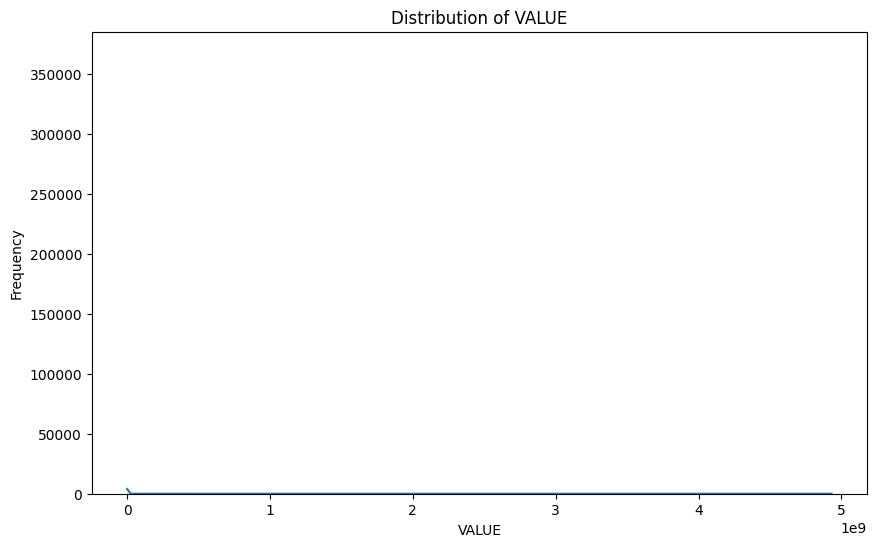

MemoryError: Unable to allocate 885. MiB for an array with shape (116002240,) and data type float64

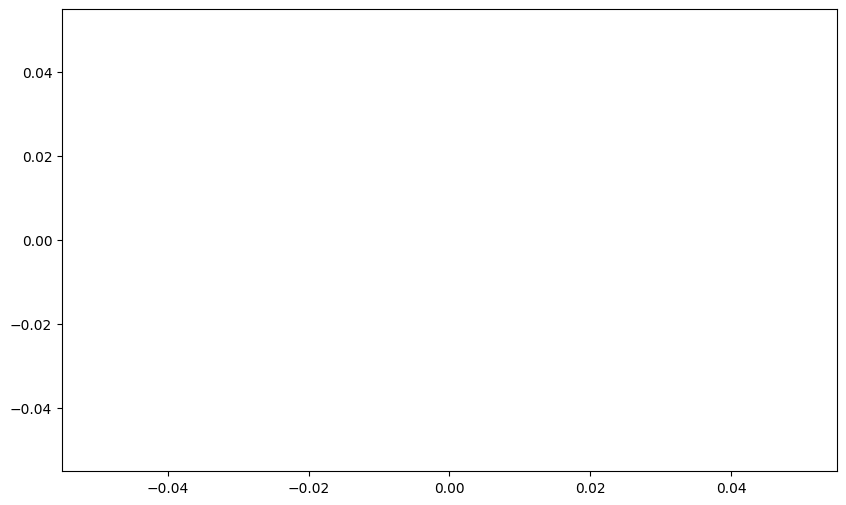

In [8]:
# # Plot histograms for numerical features
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# for feature in numerical_features:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.show()

RC/P

### Load the cleaned data and sample a subset

Had 'MemoryError'  which indicates that the dataset is too large to process in memory for plotting. 

To handle this, I have to sample a subset of the data for visualization purposes. This will allow me to perform EDA without running into memory issues.

In [3]:
# Path to the cleaned data file
cleaned_data_file = "cleaned_df.csv"

# Load the cleaned DataFrame from the CSV file
df = pd.read_csv(cleaned_data_file)

# Sample a subset of the data (e.g., 10,000 rows)
df_sample = df.sample(n=10000, random_state=42)

# Verify the sampled DataFrame
df_sample.info()
print(df_sample.head())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2161434 to 807895
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRDTYPE          10000 non-null  object
 1   USASTATE         10000 non-null  object
 2   DEPE             10000 non-null  object
 3   DISAGMOT         10000 non-null  object
 4   MEXSTATE         10000 non-null  object
 5   CANPROV          10000 non-null  object
 6   COUNTRY          10000 non-null  object
 7   VALUE            10000 non-null  int64 
 8   SHIPWT           10000 non-null  int64 
 9   FREIGHT_CHARGES  10000 non-null  int64 
 10  DF               10000 non-null  object
 11  CONTCODE         10000 non-null  object
 12  MONTH            10000 non-null  object
 13  YEAR             10000 non-null  int64 
 14  COMMODITY2       10000 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 1.2+ MB
        TRDTYPE USASTATE     DEPE DISAGMOT MEXSTATE CANPROV COUNTRY   VAL

### Perform EDA on the sampled data
#### Univariate Analysis

In [4]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df_sample.describe())

# Summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(df_sample.describe(include=['object']))



Summary statistics for numerical columns:
              VALUE        SHIPWT  FREIGHT_CHARGES         YEAR    COMMODITY2
count  1.000000e+04  1.000000e+04     1.000000e+04  10000.00000  10000.000000
mean   1.787315e+06  1.189792e+06     4.100422e+04   2022.05340     41.393800
std    3.397416e+07  7.462151e+07     1.884470e+06      1.32549     35.184333
min    8.000000e+00  0.000000e+00     0.000000e+00   2020.00000      0.000000
25%    1.210575e+04  0.000000e+00     2.000000e+02   2021.00000      0.000000
50%    6.033950e+04  1.600000e+01     9.410000e+02   2022.00000     39.000000
75%    3.379622e+05  5.056750e+03     4.910500e+03   2023.00000     76.000000
max    3.243213e+09  7.434317e+09     1.876632e+08   2024.00000     98.000000
Summary statistics for categorical columns:
       TRDTYPE USASTATE     DEPE DISAGMOT MEXSTATE CANPROV COUNTRY       DF  \
count    10000    10000    10000    10000    10000   10000   10000    10000   
unique       2       52      142        8        1    

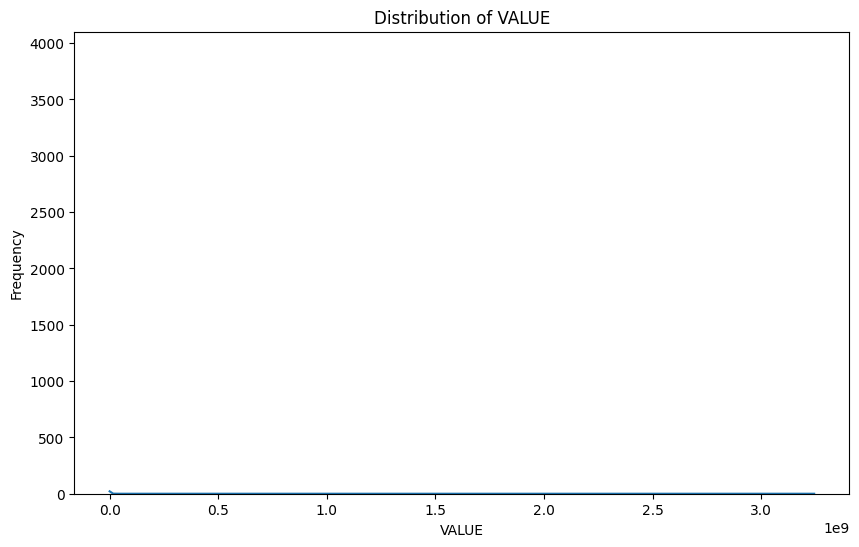

In [ ]:
# Plot histograms for numerical features
# import matplotlib.pyplot as plt
# import seaborn as sns

numerical_features = df_sample.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



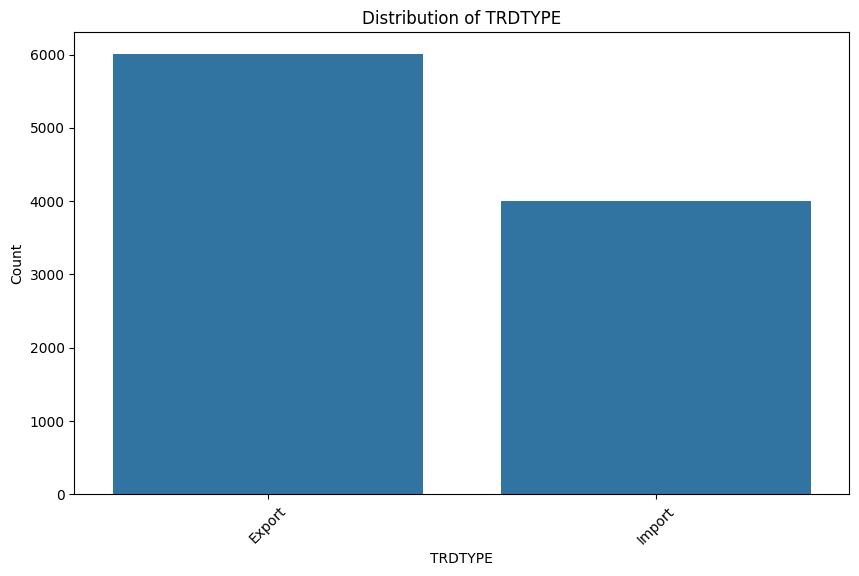

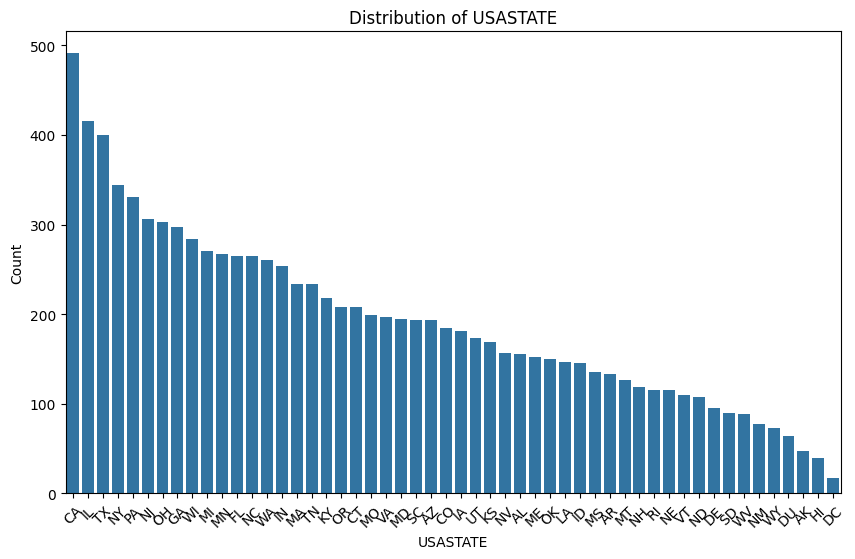

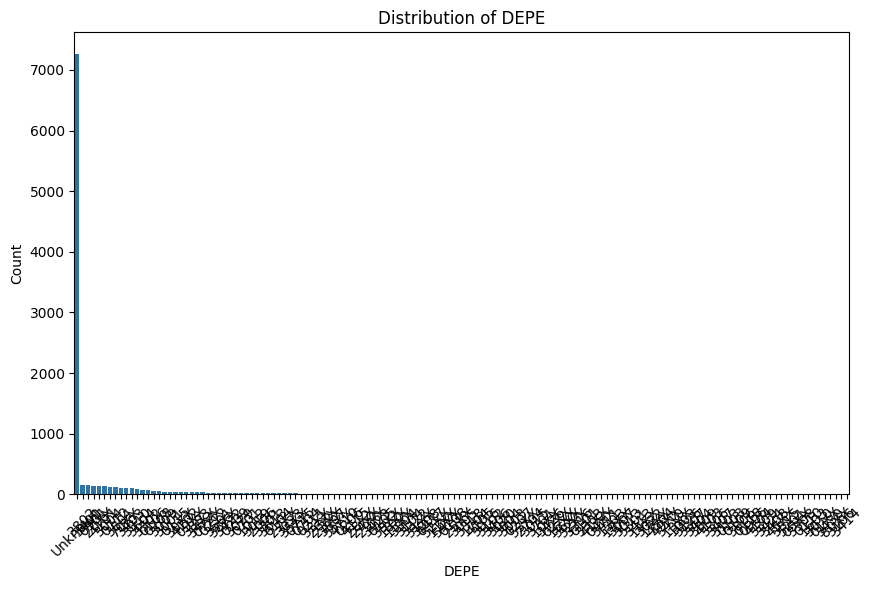

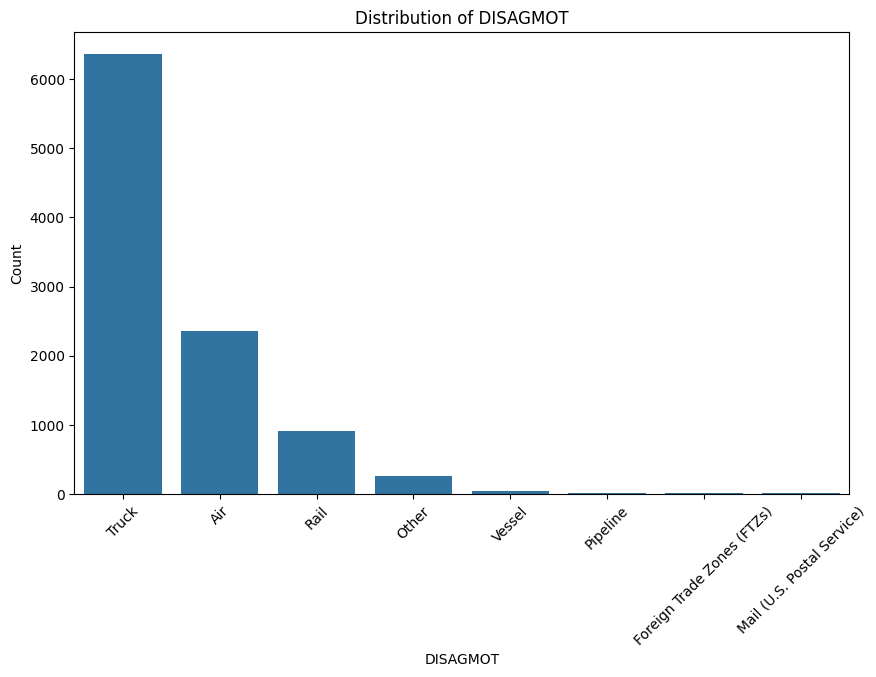

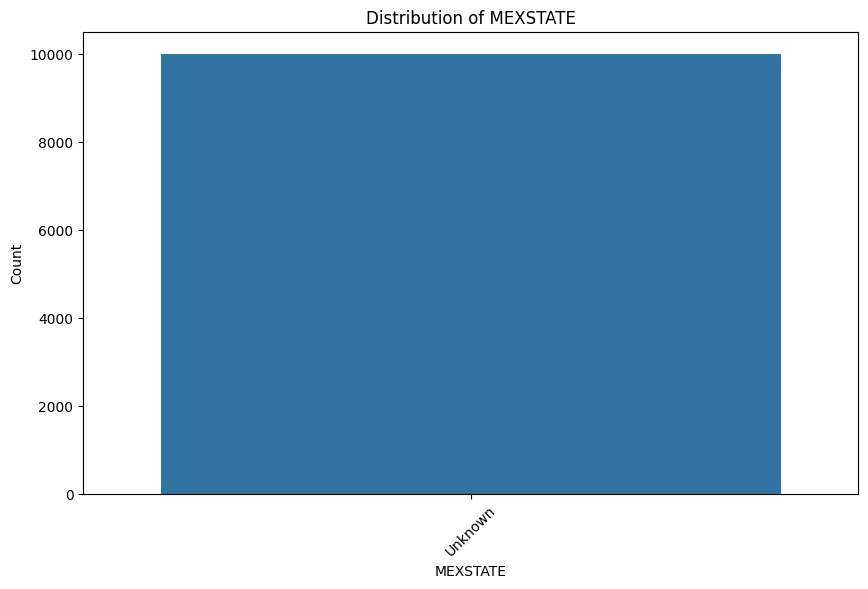

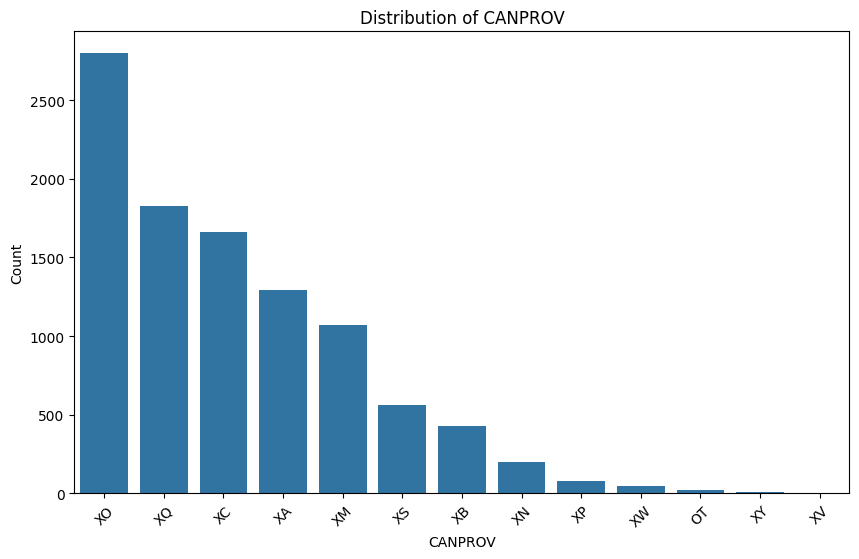

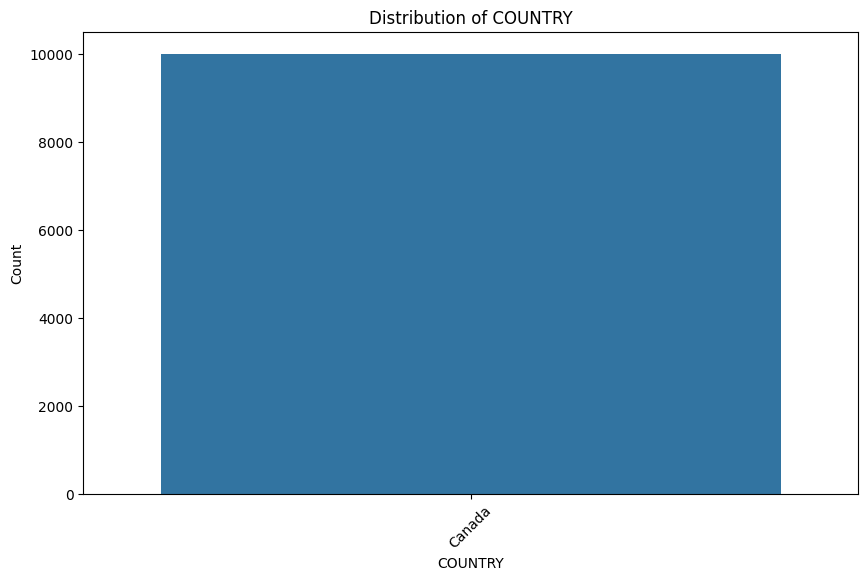

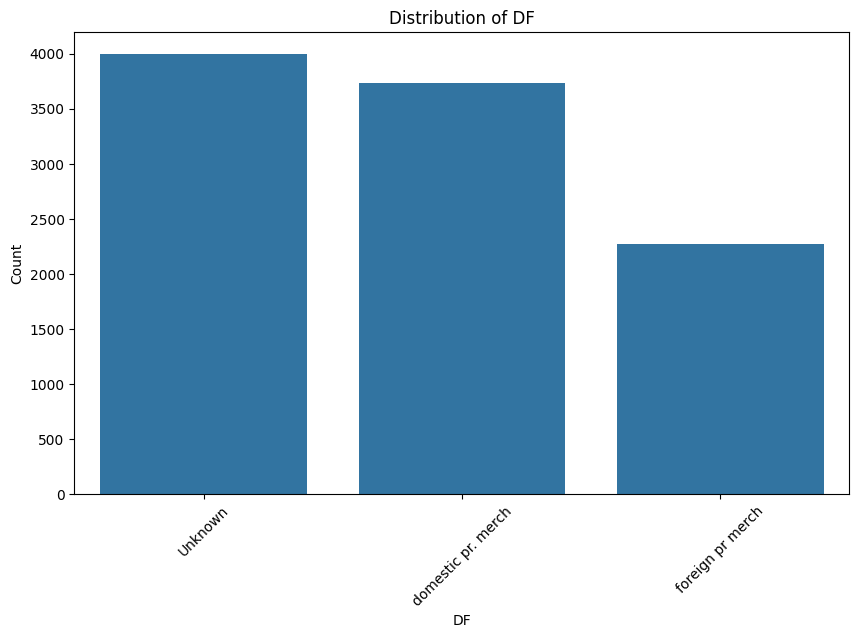

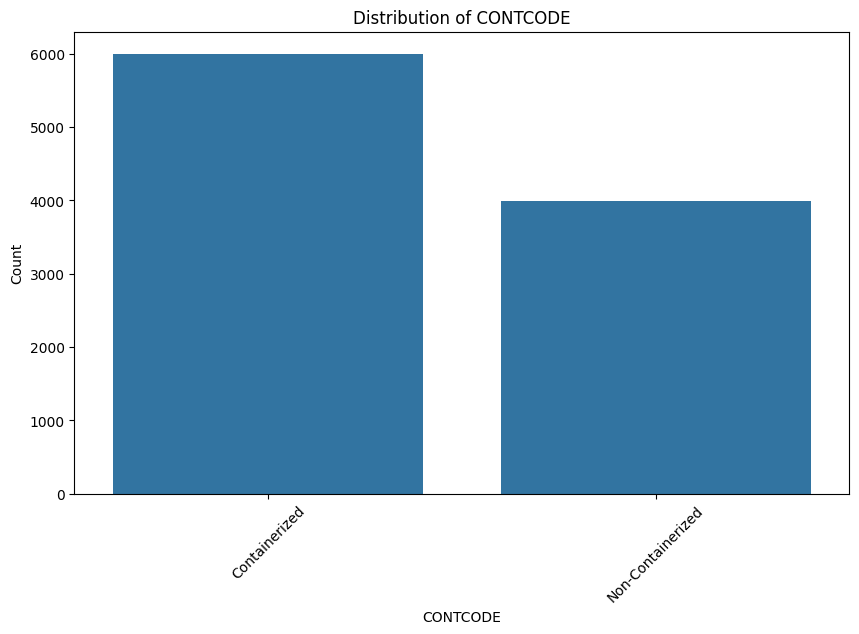

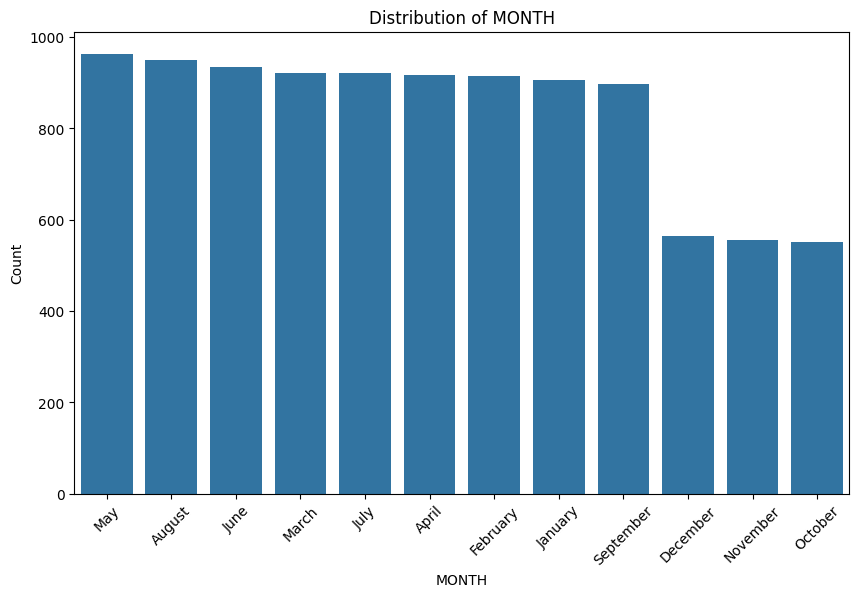

In [5]:
# Plot bar charts for categorical features
categorical_features = df_sample.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_sample, x=feature, order=df_sample[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Distribution of Categorical Features

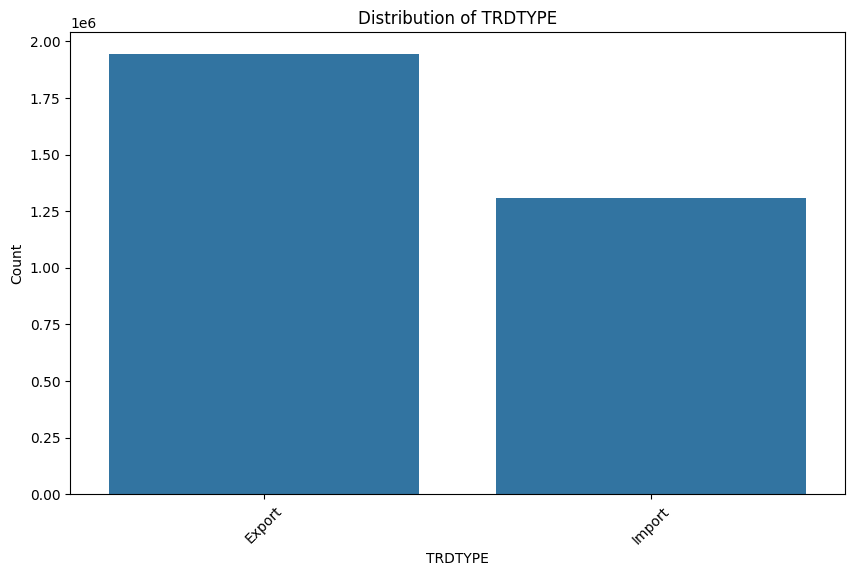

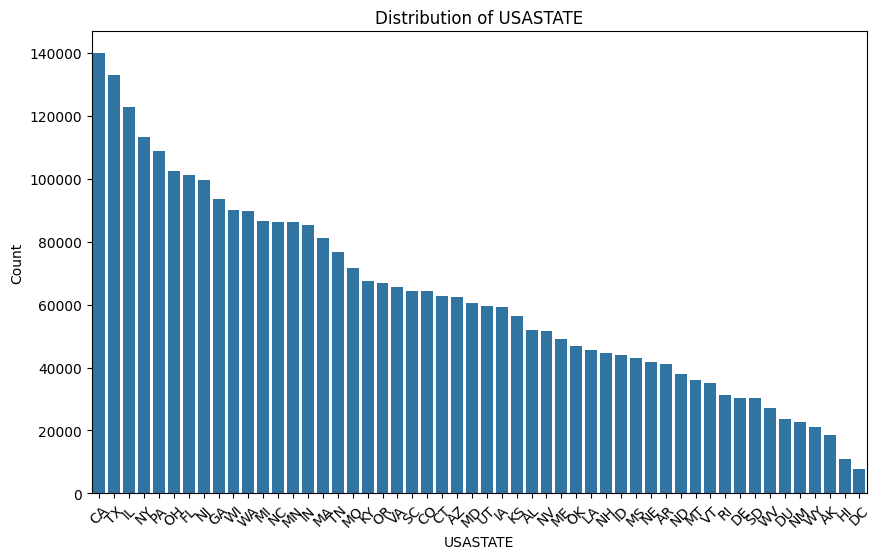

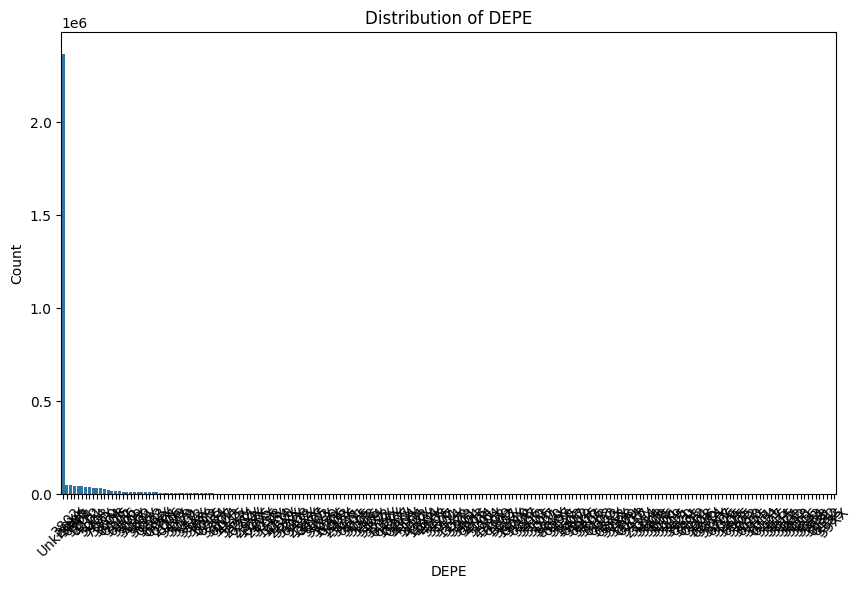

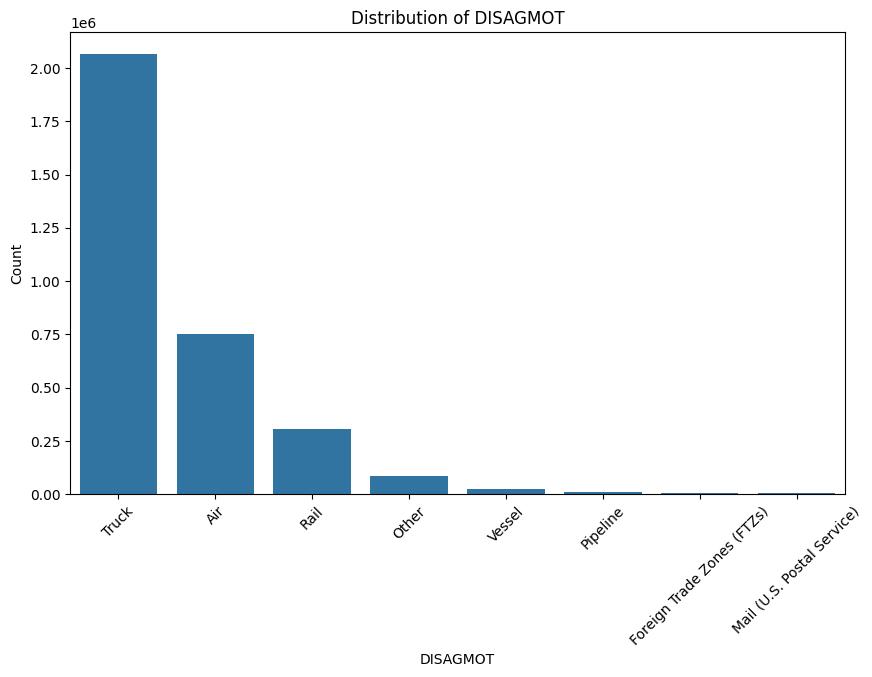

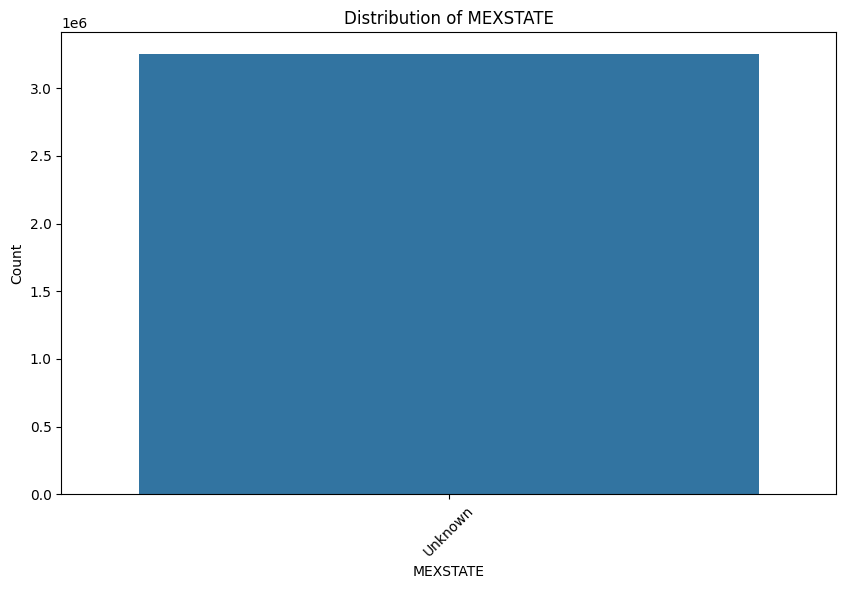

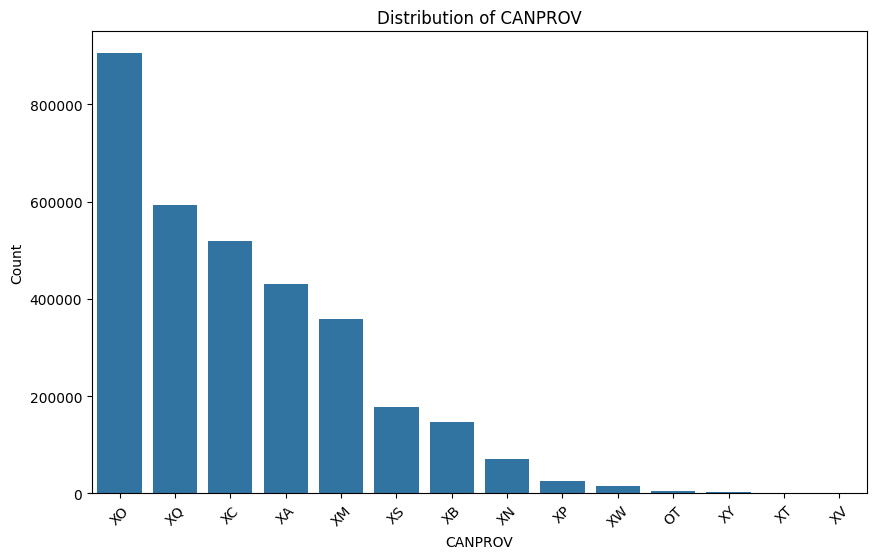

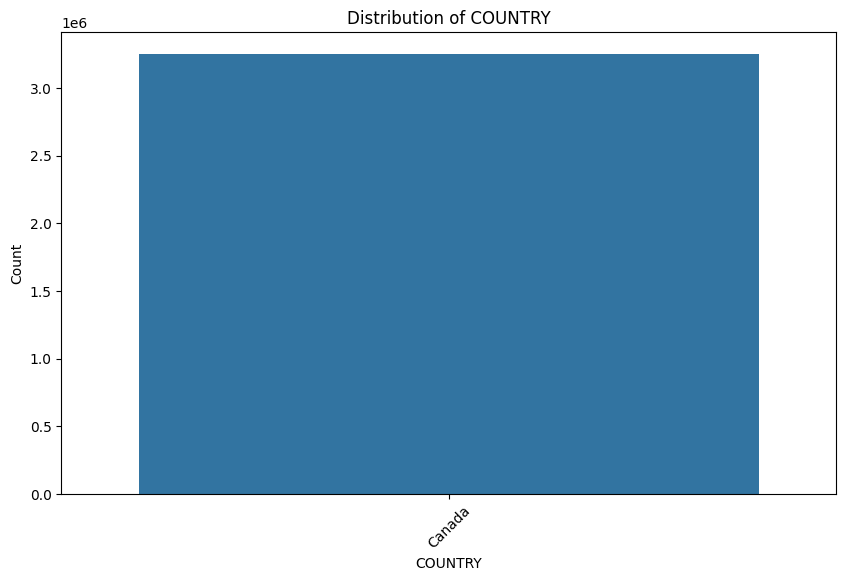

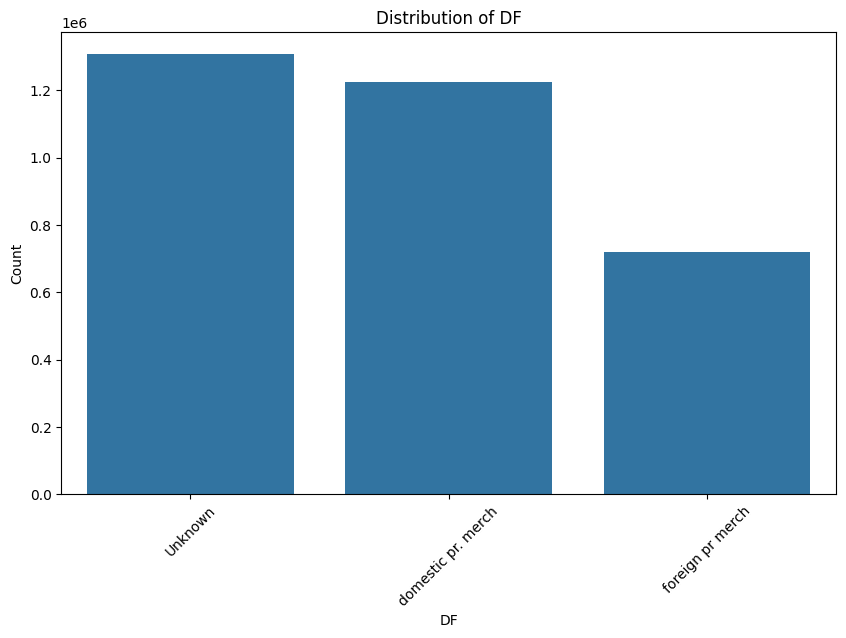

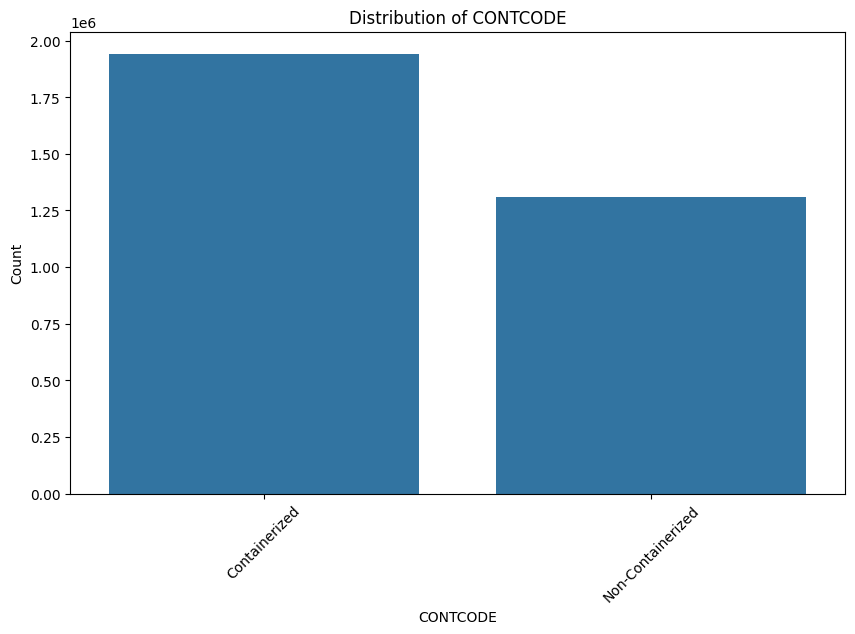

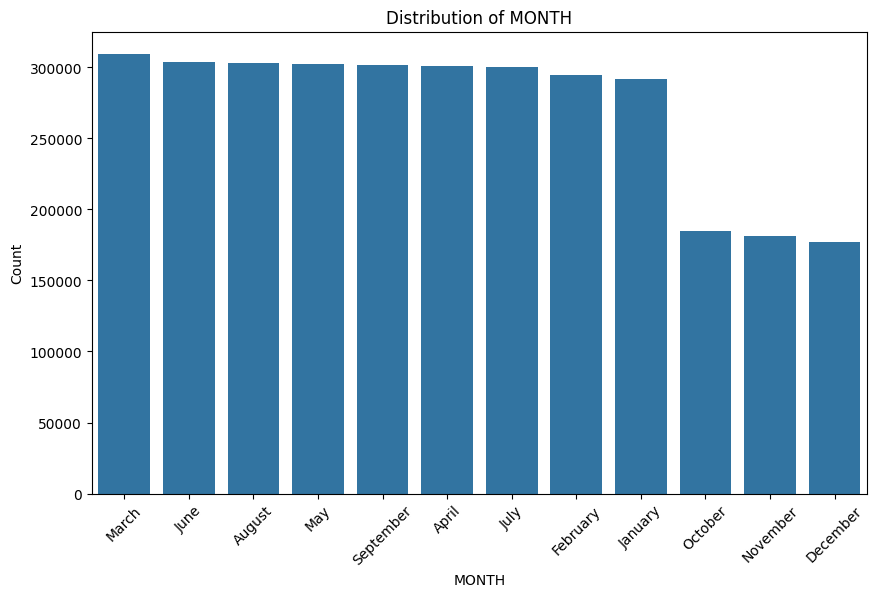

In [6]:
# Plot bar charts for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

Numerical vs Numerical

In [ ]:
# Scatter plots for numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numerical_features[i], y=numerical_features[j])
        plt.title(f'Scatter plot of {numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.show()

Numerical vs Categorical

In [ ]:
# Box plots for numerical vs categorical features
for num_feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_feature, y=num_feature)
        plt.title(f'Box plot of {num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45)
        plt.show()

### Multivariate Analysis

Pair Plot

In [ ]:
# Pair plot for numerical features
sns.pairplot(df[numerical_features])
plt.show()

Correlation Matrix

In [ ]:
# Compute and visualize the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()